In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import *

In [2]:
df = pd.read_csv('Desktop/HR_Analytics.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dataset Fields: 

1. Last evaluation

2. Number of projects

3. Average monthly hours

4. Time spent at the company

5. Whether they have had a work accident

6. Whether they have had a promotion in the last 5 years

7. Department

8. Salary

9. Whether the employee has left

Let's first try to understand which features have a correlation to dig deeper into exploratory analysis.

In [4]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


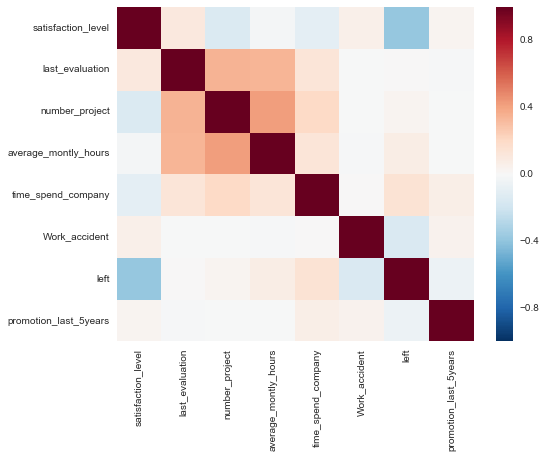

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
x=sns.heatmap(corr)
plt.show()

Now let's say we would like to explore why users leave the organisation. On a purely correlation basis, we know the strongest correlated variable seems to be satisfaction level. 

In [7]:
df_left = df.groupby('left') #grouping the entire dataset into users who left vs those who did not

**The Below Analysis explores the satisfaction levels of employees across the organisation. Even at a high level, we can see that employees who left the organisation on average had a lower satisfaction level than those who did not - The mean and median of the distribution being below 0.45 as compared to those stayed back (mean/median over 0.65)**

In [8]:
df_left.satisfaction_level.mean() 

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [9]:
df_left.satisfaction_level.median()

left
0    0.69
1    0.41
Name: satisfaction_level, dtype: float64

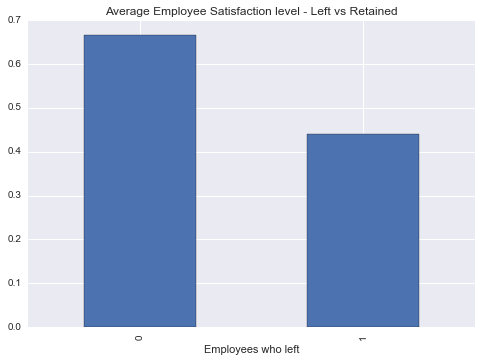

In [10]:
fig, ax = subplots()
df_left.satisfaction_level.mean().plot(kind='bar', ax=ax)
ax.set_xlabel("Employees who left");
#df_left.set_ylabel('No. of Violations')
ax.set_title('Average Employee Satisfaction level - Left vs Retained')


It is also also interesting to note that the dataset is not equally distributed with the ratio of those who left to those to did not, so the it must be taken into consideration while coming to conclusions.

In [11]:
df_left.satisfaction_level.count()

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

Now let's concentrate into the users who left the organisation to understand any patterns. 

In [12]:
df_left_only = df[df['left']==1]

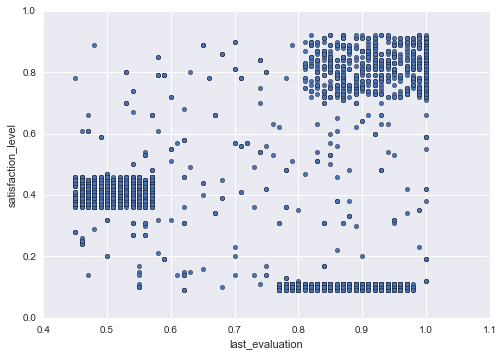

In [13]:
df_left_only.plot(kind='scatter', x='last_evaluation', y='satisfaction_level');

We come across rather 3 pools of employees in this scatterplot. Let's just give them names for better understanding 

Pool A: Those employees who have a high evaluation and high satisfaction level but still leave - (high performers and happy)

Pool B: Those employees who have a low evaluation and medium satisfaction level - (low performers and unhappy)

Pool C: Those employees who have a high evaluation and a low satisfaction level - (high perfomers but unhappy)


Let's focus in on group A and C and see how they compare to those users 

In [14]:
df_happy_performers = df_left_only[(df_left_only['satisfaction_level']>=0.7)] #high satisfaction
df_happy_performers = df_happy_performers[df_happy_performers['last_evaluation']>=0.8] #high performance 

In [15]:
df_unhappy_performers = df_left_only[(df_left_only['satisfaction_level']<0.2)] #low satisfaction
df_unhappy_performers = df_unhappy_performers[df_unhappy_performers['last_evaluation']>=0.75] #high performance

In [16]:
df_happy_performers.mean()

satisfaction_level         0.818594
last_evaluation            0.923984
number_project             4.565848
average_montly_hours     244.463170
time_spend_company         5.151786
Work_accident              0.051339
left                       1.000000
promotion_last_5years      0.001116
dtype: float64

In [17]:
df_unhappy_performers.mean()

satisfaction_level         0.102469
last_evaluation            0.872335
number_project             6.183240
average_montly_hours     275.757542
time_spend_company         4.083799
Work_accident              0.045810
left                       1.000000
promotion_last_5years      0.003352
dtype: float64

In [20]:
df_stayed = df[df['left']==0] #employees who did not leave

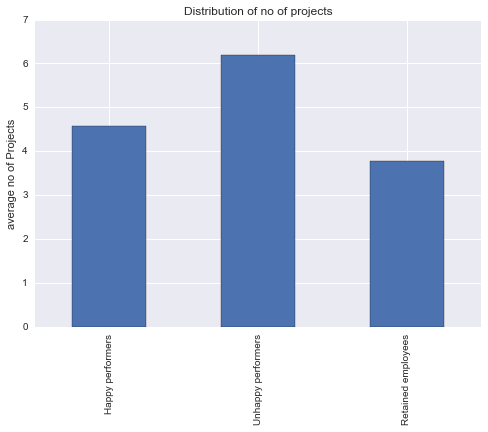

In [21]:
df_ = pd.DataFrame( columns=[(df.columns)], index = range(3))
df_.loc[0] = df_happy_performers.mean()
df_.loc[1] = df_unhappy_performers.mean() 
df_.loc[2] = df_stayed.mean()

fig, ax = subplots()
df_.number_project.plot(kind='bar', ax=ax)
ax.set_ylabel('average no of Projects')
ax.set_title('Distribution of no of projects')
ax.set_xticklabels(['Happy performers','Unhappy performers','Retained employees'])

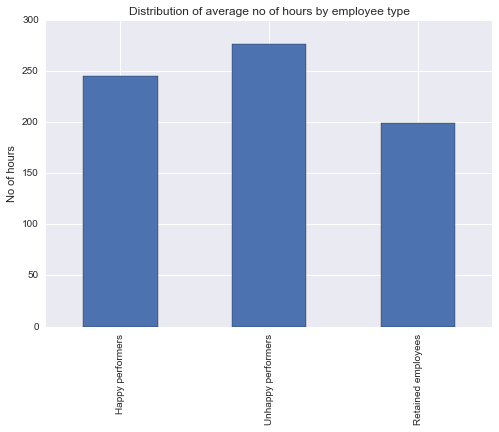

In [22]:
fig, ax = subplots()
df_.average_montly_hours.plot(kind='bar', ax=ax)
ax.set_ylabel('No of hours')
ax.set_title('Distribution of average no of hours by employee type')
ax.set_xticklabels(['Happy performers','Unhappy performers','Retained employees'])

In [24]:
df_unhappy_performers.mean() #this is really interesting

satisfaction_level         0.102469
last_evaluation            0.872335
number_project             6.183240
average_montly_hours     275.757542
time_spend_company         4.083799
Work_accident              0.045810
left                       1.000000
promotion_last_5years      0.003352
dtype: float64

In [23]:
df_stayed.mean()

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64

This really is interesting as it shows that our employees from Pool C: high performers but low satisfaction level (unhappy performers), work more hours than their counterparts. For employees who did not leave, we can see that they worked for about 200 hours on average a month. that's 50 hours a week. **For our pool C we can see that they worked 275 hours on average. That's 75 hours more. Could this be a possible reason for their low satisfaction rate?** 

**These unhappy performers also worked on over 6 or more projects as compared to their counterparts who stayed back, who worked on an average of 3.7 projects.**

While it may need deeper analysis and domain knowledge to understand the projects or work required by these employees, the intial analysis is revealing enough. These unhappy employees were working significantly more than their colleagues which could've let to their discontent.  

Future work: Look at department wise attrition rate for the firm and identify causes for why people leave in a particualr department. 